In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)
image_count = faces.images.shape[0]
image_height = faces.images.shape[1]
image_width = faces.images.shape[2]
class_count = len(faces.target_names)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


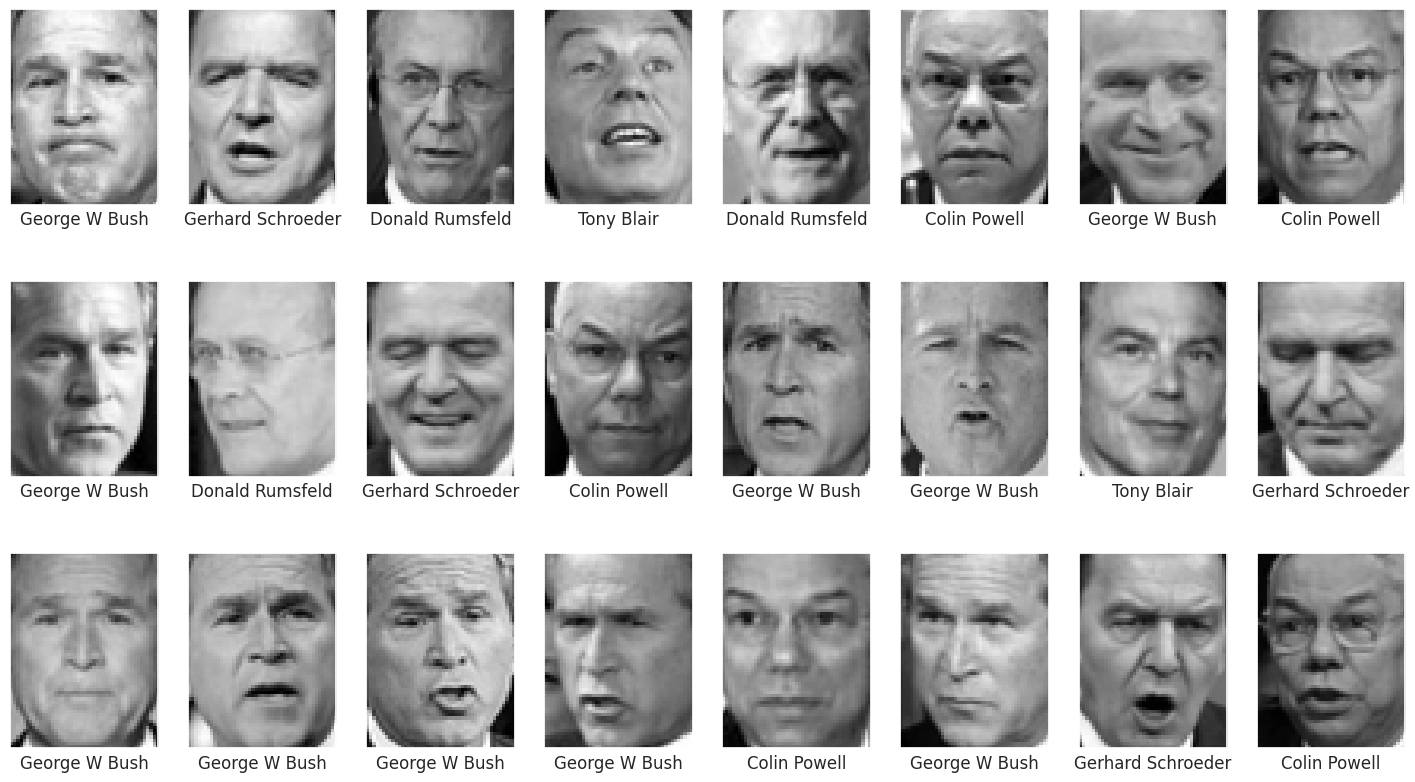

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

<Axes: >

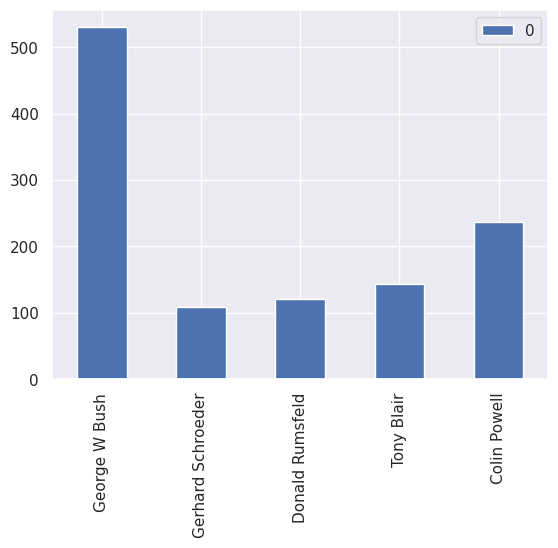

In [3]:
from collections import Counter
counts = Counter(faces.target)
names = {}

for key in counts.keys():
    names[faces.target_names[key]] = counts[key]

df = pd.DataFrame.from_dict(names, orient='index')
df.plot(kind='bar')

In [5]:
mask = np.zeros(faces.target.shape, dtype=np.bool_)

In [6]:
print(faces)

{'data': array([[0.32026145, 0.34771243, 0.26013073, ..., 0.4       , 0.5542484 ,
        0.82483655],
       [0.21045752, 0.18954249, 0.27189544, ..., 0.9281046 , 0.89673203,
        0.86928105],
       [0.14379086, 0.151634  , 0.16209151, ..., 0.3869281 , 0.2784314 ,
        0.23137255],
       ...,
       [0.8457516 , 0.83398694, 0.8091503 , ..., 0.57254905, 0.54509807,
        0.62614375],
       [0.37124184, 0.4627451 , 0.52287585, ..., 0.8679738 , 0.8392157 ,
        0.5124183 ],
       [0.13594772, 0.3124183 , 0.427451  , ..., 0.09411765, 0.14248367,
        0.08366013]], dtype=float32), 'images': array([[[0.32026145, 0.34771243, 0.26013073, ..., 0.4143791 ,
         0.39215687, 0.351634  ],
        [0.3503268 , 0.39346406, 0.18300654, ..., 0.4392157 ,
         0.40261438, 0.36862746],
        [0.3764706 , 0.3529412 , 0.20522876, ..., 0.33594772,
         0.39607844, 0.37254903],
        ...,
        [0.08104575, 0.09673203, 0.1254902 , ..., 0.39477125,
         0.38169935, 0.41

In [7]:
print(faces.target)

[2 3 1 ... 4 2 4]


In [8]:
print(np.unique(faces.target))

[0 1 2 3 4]


In [9]:
for target in np.unique(faces.target):
    print(np.where(faces.target == target)[0][:100])

[  5   7  11  20  23  24  25  29  30  35  43  46  55  58  62  79  81  88
  93 101 105 118 119 120 121 132 135 144 146 151 155 164 170 173 174 177
 180 181 183 184 192 202 205 209 210 219 223 225 228 237 256 257 261 274
 276 277 278 280 281 285 301 303 311 314 326 333 335 349 358 359 369 370
 372 376 381 382 384 394 398 399 405 412 416 423 426 429 438 441 444 449
 452 457 459 465 488 489 492 494 495 501]
[  2   4   9  27  28  32  40  45  57  75  80  96  97  98 106 107 122 124
 143 147 159 161 162 163 187 193 199 203 206 218 232 233 241 244 252 253
 268 272 273 292 305 307 313 321 336 337 338 354 356 362 366 375 392 395
 402 406 408 410 419 421 436 466 496 497 507 531 534 536 542 583 593 595
 640 641 644 652 657 667 677 678 703 706 713 719 720 722 731 738 750 758
 767 768 777 800 868 869 876 878 895 900]
[  0   6   8  12  13  16  17  18  19  21  26  31  33  34  36  37  38  41
  49  50  51  52  53  59  60  61  63  65  66  67  68  69  70  72  73  74
  76  77  78  83  84  85  86  87  89  92

In [10]:
for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:100]] = 1
    print(mask)

[False False False ... False False False]
[False False  True ... False False False]
[ True False  True ... False False False]
[ True  True  True ... False False False]
[ True  True  True ... False False False]


In [11]:
x_faces = faces.data[mask]
y_faces = faces.target[mask]
print(x_faces.shape)
print(y_faces.shape)

(500, 2914)
(500,)


In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

face_images = x_faces / 255
face_labels = to_categorical(y_faces)

x_train, x_test, y_train, y_test = train_test_split(face_images, face_labels, train_size=0.8, stratify=face_labels, random_state=0)

In [13]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1492480   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 1495045 (5.70 MB)
Trainable params: 1495045 (5.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 1s 28ms/step - loss: 1.6127 - accuracy: 0.1975 - val_loss: 1.6071 - val_accuracy: 0.3000
Epoch 2/100
20/20 [==============================] - 0s 18ms/step - loss: 1.6088 - accuracy: 0.2000 - val_loss: 1.6056 - val_accuracy: 0.2200
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 1.6046 - accuracy: 0.2000 - val_loss: 1.6032 - val_accuracy: 0.2100
Epoch 4/100
20/20 [==============================] - 0s 17ms/step - loss: 1.6031 - accuracy: 0.2325 - val_loss: 1.6018 - val_accuracy: 0.2700
Epoch 5/100
20/20 [==============================] - 1s 30ms/step - loss: 1.6000 - accuracy: 0.2400 - val_loss: 1.6003 - val_accuracy: 0.2600
Epoch 6/100
20/20 [==============================] - 0s 17ms/step - loss: 1.5940 - accuracy: 0.3500 - val_loss: 1.5951 - val_accuracy: 0.2800
Epoch 7/100
20/20 [==============================] - 0s 19ms/step - loss: 1.5917 - accuracy: 0.3850 - val_loss: 1.5911 - val_accuracy: 0.5500
Epoch 

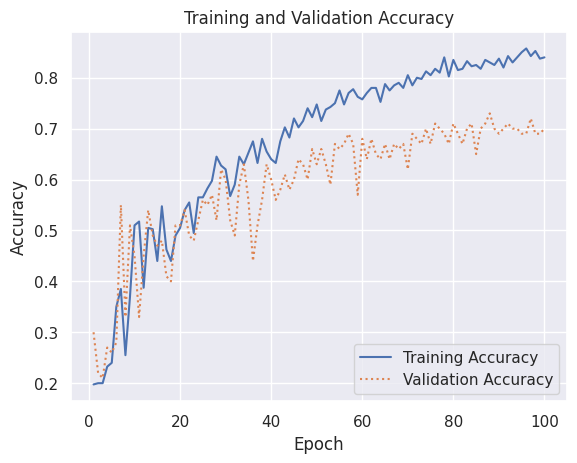

In [15]:
def show_history(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()

show_history(hist)

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_width * image_height,)))
model.add(Dense(class_count, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 1.6113 - accuracy: 0.1725 - val_loss: 1.6084 - val_accuracy: 0.2000
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 1.6094 - accuracy: 0.1925 - val_loss: 1.6076 - val_accuracy: 0.2000
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.6077 - accuracy: 0.2225 - val_loss: 1.6066 - val_accuracy: 0.2700
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6067 - accuracy: 0.2650 - val_loss: 1.6056 - val_accuracy: 0.2000
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6051 - accuracy: 0.2125 - val_loss: 1.6047 - val_accuracy: 0.2000
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6041 - accuracy: 0.2025 - val_loss: 1.6037 - val_accuracy: 0.2100
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6025 - accuracy: 0.2550 - val_loss: 1.6022 - val_accuracy: 0.3100
Epoch 8/100


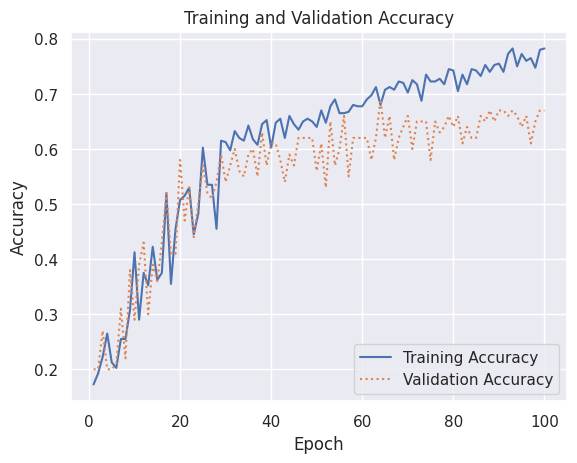

In [17]:
show_history(hist)

4/4 [==============================] - 0s 3ms/step


Text(109.44999999999996, 0.5, 'Actual label')

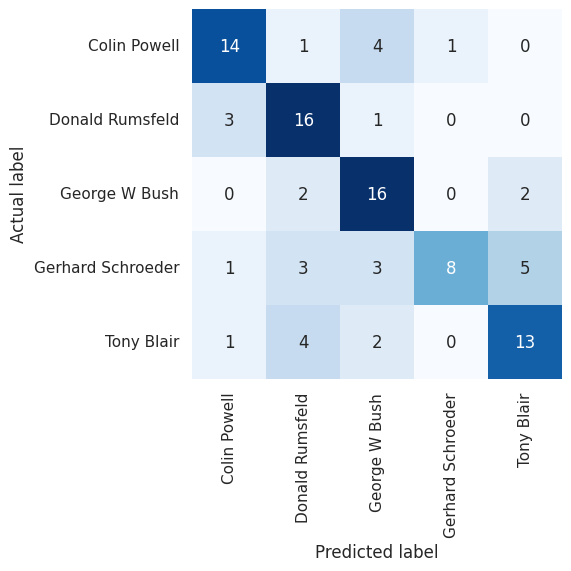

In [18]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
mat = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')